In [1]:
import pandas as pd
import ruptures as rpt
import numpy as np
import os
import joblib
import model.function.visualise as vis
from sklearn.metrics import confusion_matrix
import model.function.DataFunction as dt

In [2]:
vi = vis.Visualise()
dtf = dt.DataFunction()

In [3]:
path =  'C://python//train//'
fallPath = 'C://python//train//fall_csv//'
normalPath = 'C://python//train//normal_csv//'

In [4]:
features = [False,  True, False, False,  True,  True,  True, False, False,
       False, False, False, False,  True, False, False,  True,  True,
       False, False,  True, False, False,  True, False, False, False,
        True,  True,  True, False,  True, False,  True, False, False,
        True,  True, False, False, False, False, False, False, False,
       False, False, False,  True,  True,  True,  True, False, False,
       False,  True,  True, False, False,  True, False, False, False,
        True, False, False, False,  True,  True,  True, False,  True,
        True,  True, False,  True, False,  True, False,  True, False,
       False, False,  True,  True,  True, False,  True,  True, False,
        True,  True, False, False, False, False,  True,  True,  True,
       False,  True,  True, False,  True, False,  True,  True,  True,
       False, False, False, False, False,  True,  True,  True, False,
        True, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False]

In [5]:
model_new = joblib.load(path + 'model_final//model_pso.sav')

In [6]:
rawFallData = pd.concat([pd.read_csv(fallPath + file) for file in os.listdir(fallPath)])
rawNormalData = pd.concat([pd.read_csv(normalPath + file) for file in os.listdir(normalPath)]) 

In [7]:
data = np.concatenate((rawFallData, rawNormalData), axis=0)

In [8]:
label = dtf.labelSet('addframe', fallPath, normalPath)

In [10]:
y_pred = model_new.predict(data[:, features])

In [11]:
vi.report(y_pred, label)

              precision    recall  f1-score   support

          -1       0.99      1.00      1.00      6559
           1       1.00      0.98      0.99      2294

    accuracy                           1.00      8853
   macro avg       1.00      0.99      0.99      8853
weighted avg       1.00      1.00      1.00      8853



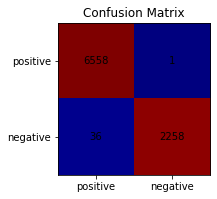

In [12]:
vi.conf_mat(y_pred, label)

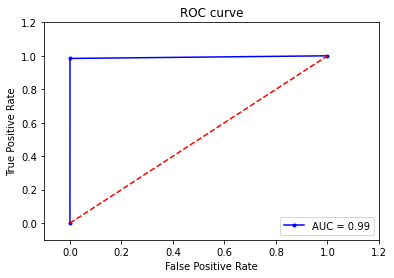

In [13]:
vi.show_roc(y_pred, label)